In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('QueryResults.csv',names=['Dates','Tag','Posts'],header=0)
df.head()

,Dates,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [3]:
df.size

5973

In [4]:
df.groupby('Tag').sum()

,Dates,Posts
Tag,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


In [5]:
df.tail()

,Dates,Tag,Posts
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [6]:
df.groupby('Tag').count()

,Dates,Posts
Tag,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [7]:
df['Dates']=pd.to_datetime(df['Dates'])
df.head()

,Dates,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [19]:
reshaped_df=df.pivot(index='Dates',columns='Tag',values='Posts')
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Dates,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [20]:
reshaped_df.count()

Tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [21]:
reshaped_df=reshaped_df.fillna(0)
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Dates,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [22]:
reshaped_df.isna().any(axis=1)

Dates
2008-07-01    False
2008-08-01    False
2008-09-01    False
2008-10-01    False
2008-11-01    False
              ...  
2020-03-01    False
2020-04-01    False
2020-05-01    False
2020-06-01    False
2020-07-01    False
Length: 145, dtype: bool

Text(0, 0.5, 'Number of Posts')

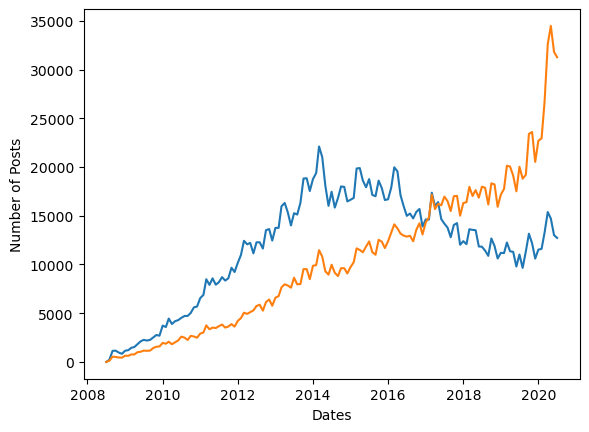

In [31]:
plt.plot(reshaped_df.index,reshaped_df['java'],reshaped_df['python'])
plt.xlabel('Dates')
plt.ylabel('Number of Posts')

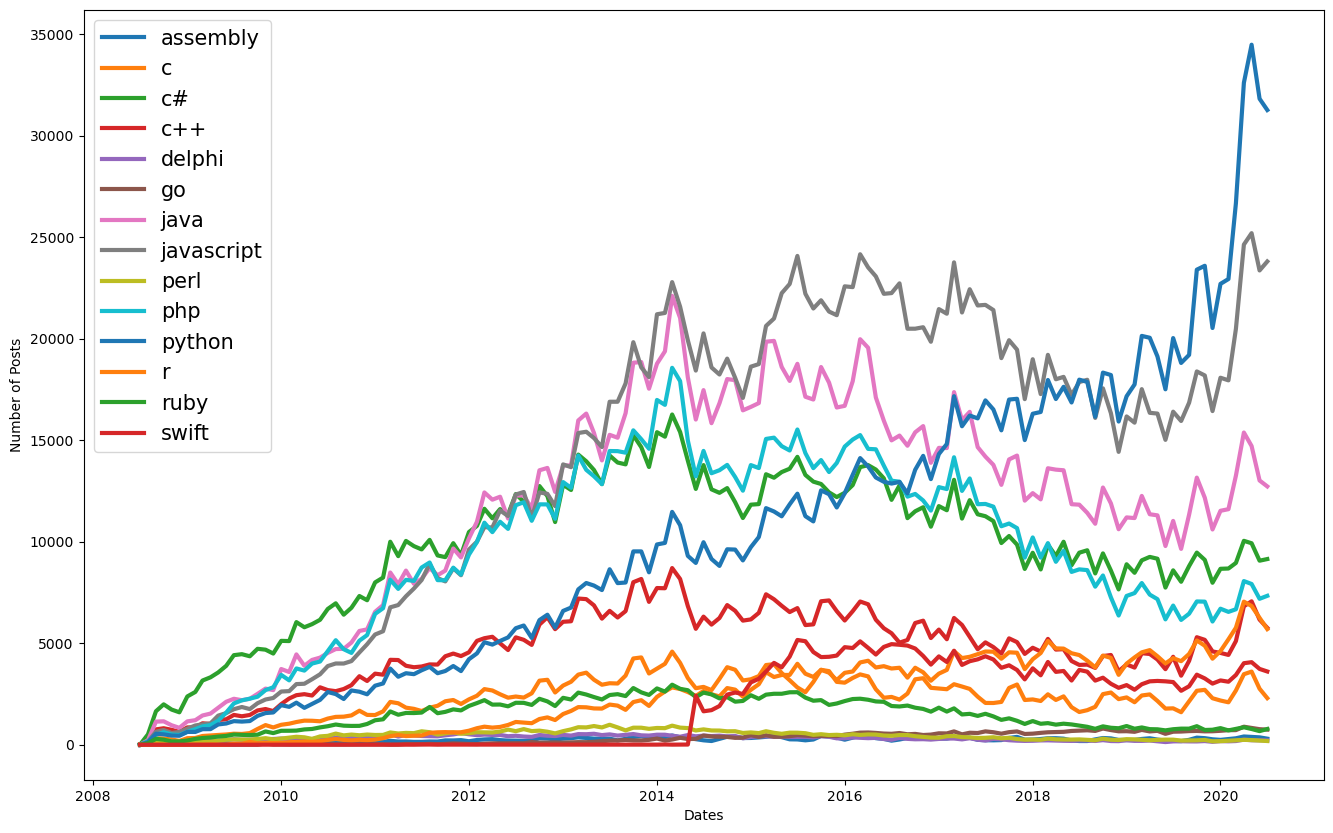

In [49]:
plt.figure(figsize=(16,10))
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column],label=reshaped_df[column].name,linewidth=3)
plt.xlabel('Dates')
plt.ylabel('Number of Posts')
plt.legend(fontsize=15)
plt.show()

In [46]:
df.groupby('Dates').count()

,Tag,Posts
Dates,,
2008-07-01,1,1
2008-08-01,11,11
2008-09-01,12,12
2008-10-01,11,11
2008-11-01,12,12
...,...,...
2020-03-01,14,14
2020-04-01,14,14
2020-05-01,14,14
